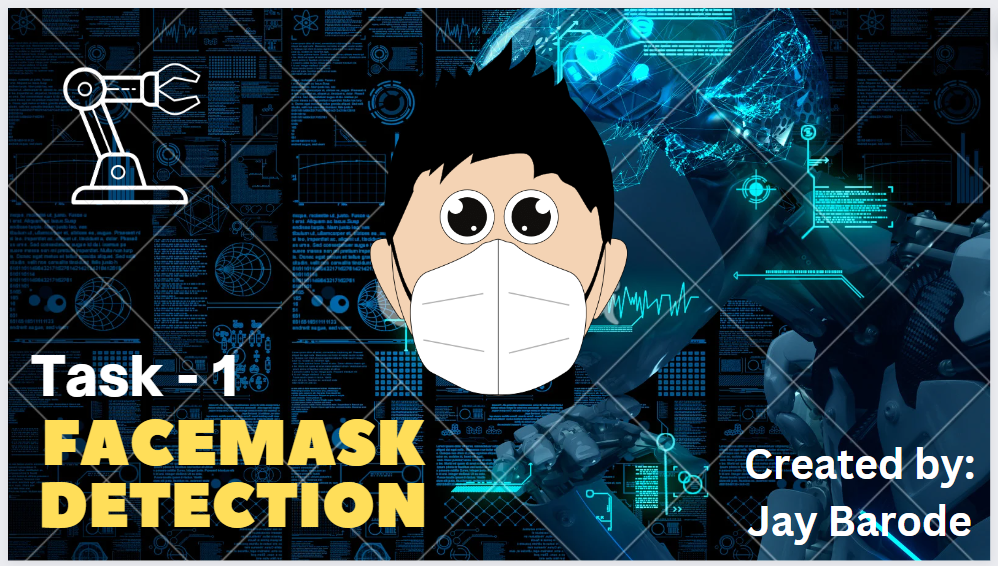

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [4]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**


In [5]:
# API to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The datset is extracted')


The datset is extracted


In [7]:
!ls

 148-shutterstock_128569691.jpg  'download (1).jpg'	  images.jpg
 1681494917556.jpg		  download.jpg		  kaggle.json
 data				  face-mask-dataset.zip   sample_data


**Importing the dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:0])

['with_mask_206.jpg', 'with_mask_331.jpg', 'with_mask_1429.jpg', 'with_mask_3343.jpg', 'with_mask_3419.jpg']
[]


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:0])

['without_mask_1171.jpg', 'without_mask_2819.jpg', 'without_mask_1583.jpg', 'without_mask_68.jpg', 'without_mask_3320.jpg']
[]


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating labels for the two class of images**

With mask -> 1
Without mask -> 0

In [12]:
 #create the labels
 with_mask_labels = [1]*3725
 without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the image**

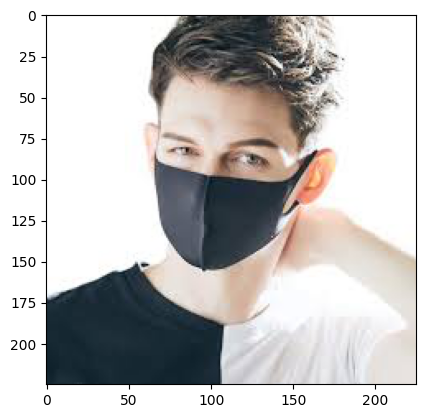

In [15]:
#Displaying with_mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2609.jpg')
imgplot = plt.imshow(img)
plt.show()

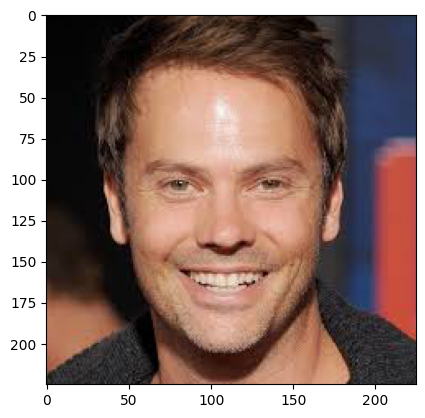

In [16]:
#Displaying without_mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2760.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the image
2. Convert the image to numpy arrays

In [17]:
#For with mask images
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  #resizing the image
  image = image.resize((128,128))
  image = image.convert('RGB')
  #Convert the image to numpy arrays
  image = np.array(image)   
  data.append(image)

#For without mask images

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  #resizing the image
  image = image.resize((128,128))
  image = image.convert('RGB')
  #Convert the image to numpy arrays
  image = np.array(image)   
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
len(data)

7553

In [19]:
data[0]

array([[[ 23, 101, 139],
        [ 18,  96, 134],
        [ 13,  91, 129],
        ...,
        [ 10,  73, 104],
        [  6,  71, 101],
        [  4,  69,  99]],

       [[ 18,  97, 134],
        [ 13,  91, 129],
        [  7,  85, 123],
        ...,
        [  8,  71, 102],
        [  7,  72, 102],
        [  7,  72, 102]],

       [[ 18,  98, 135],
        [ 16,  95, 133],
        [ 12,  89, 129],
        ...,
        [ 11,  74, 105],
        [ 10,  75, 105],
        [ 10,  75, 105]],

       ...,

       [[125, 132, 153],
        [113, 119, 140],
        [ 99, 106, 126],
        ...,
        [148, 138, 155],
        [120, 109, 125],
        [119, 106, 123]],

       [[123, 130, 151],
        [115, 121, 143],
        [102, 110, 131],
        ...,
        [138, 129, 145],
        [115, 103, 120],
        [122, 109, 126]],

       [[123, 131, 153],
        [114, 122, 143],
        [104, 112, 133],
        ...,
        [130, 120, 137],
        [116, 104, 120],
        [129, 116, 133]]

In [20]:
type(data[0])


numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#Converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
#Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [29]:
#image before scaling
X_train[0]

array([[[224, 223, 219],
        [224, 223, 219],
        [226, 225, 221],
        ...,
        [249, 248, 246],
        [249, 248, 246],
        [249, 248, 246]],

       [[224, 223, 219],
        [225, 224, 220],
        [227, 226, 222],
        ...,
        [249, 248, 246],
        [249, 248, 246],
        [249, 248, 246]],

       [[225, 224, 220],
        [226, 225, 221],
        [228, 227, 223],
        ...,
        [249, 248, 246],
        [249, 248, 246],
        [249, 248, 246]],

       ...,

       [[ 11,  23,  65],
        [ 11,  24,  66],
        [  5,  19,  59],
        ...,
        [ 34,  53, 127],
        [ 37,  61, 134],
        [ 41,  66, 140]],

       [[  9,  21,  60],
        [ 11,  25,  62],
        [  5,  21,  56],
        ...,
        [ 30,  43, 116],
        [ 35,  53, 125],
        [ 38,  58, 133]],

       [[ 11,  20,  61],
        [ 14,  24,  65],
        [ 12,  23,  62],
        ...,
        [ 33,  46, 120],
        [ 32,  48, 122],
        [ 39,  57, 133]]

In [30]:
#image after scaling
X_train_scaled[0]

array([[[0.87843137, 0.8745098 , 0.85882353],
        [0.87843137, 0.8745098 , 0.85882353],
        [0.88627451, 0.88235294, 0.86666667],
        ...,
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588]],

       [[0.87843137, 0.8745098 , 0.85882353],
        [0.88235294, 0.87843137, 0.8627451 ],
        [0.89019608, 0.88627451, 0.87058824],
        ...,
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588]],

       [[0.88235294, 0.87843137, 0.8627451 ],
        [0.88627451, 0.88235294, 0.86666667],
        [0.89411765, 0.89019608, 0.8745098 ],
        ...,
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588]],

       ...,

       [[0.04313725, 0.09019608, 0.25490196],
        [0.04313725, 0.09411765, 0.25882353],
        [0.01960784, 0

**Building a Convolutional Neural Network (CNN)**

In [31]:
import tensorflow as tf
from tensorflow import keras


In [32]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size =(3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size =(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [33]:
#Compile the Neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [34]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 15s 24ms/step - loss: 0.5338 - acc: 0.7611 - val_loss: 0.3070 - val_acc: 0.8562
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.3152 - acc: 0.8709 - val_loss: 0.2478 - val_acc: 0.9124
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2496 - acc: 0.9033 - val_loss: 0.1960 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2098 - acc: 0.9191 - val_loss: 0.2116 - val_acc: 0.9256
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1628 - acc: 0.9362 - val_loss: 0.1871 - val_acc: 0.9339


**Model Evaluation**

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =',accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2302 - acc: 0.9133
Test Accuracy = 0.9133024215698242


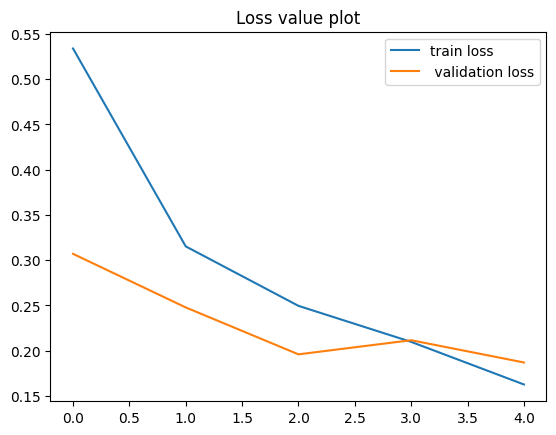

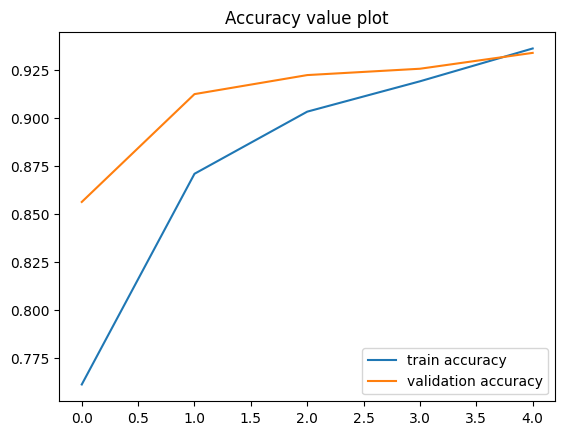

In [36]:
h = history

#plotting the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = ' validation loss')
plt.title('Loss value plot')
plt.legend()
plt.show()

#Plotting the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.title('Accuracy value plot')
plt.legend()
plt.show() 

**Building a predictive System**

Path of the image to be predicted: /content/images.jpg


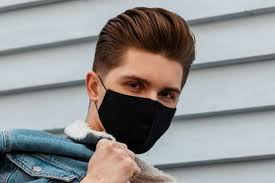

1/1 [==============================] - 0s 31ms/step
[[0.06665689 0.85621375]]
1
The person in the image is wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label =  np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')